In [1]:
# =============================================================================
# 1. GEREKLİ KÜTÜPHANELERİ YÜKLEME
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

# Grafik ayarları
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✅ Temel kütüphaneler yüklendi!")

✅ Temel kütüphaneler yüklendi!


In [2]:
# =============================================================================
# 2. VERİ SETİNİ YÜKLEME
# =============================================================================

# Veri setini yükleme
file_path = r"C:\Users\ekol\Desktop\IMDB Dataset.csv"

try:
    df = pd.read_csv(file_path)
    print("✅ IMDB Dataset başarıyla yüklendi!")
    print(f"📊 Veri seti boyutu: {df.shape}")
except FileNotFoundError:
    print("❌ Dosya bulunamadı! Dosya yolunu kontrol edin.")
except Exception as e:
    print(f"❌ Hata: {e}")

✅ IMDB Dataset başarıyla yüklendi!
📊 Veri seti boyutu: (50000, 2)


In [3]:
# =============================================================================
# 3. VERİ SETİNİ ANLAMAK - İLK BAKIŞ
# =============================================================================

print("\n" + "="*50)
print("📋 VERİ SETİ HAKKINDA TEMEL BİLGİLER")
print("="*50)

# Dataset'in ilk 5 satırı
print("🔍 İlk 5 satır:")
print(df.head())

print("\n📊 Veri seti boyutu:")
print(f"Satır sayısı: {df.shape[0]:,}")
print(f"Sütun sayısı: {df.shape[1]:,}")

print("\n📋 Sütun bilgileri:")
print(df.info())

print("\n📈 Sütun adları:")
print(df.columns.tolist())


📋 VERİ SETİ HAKKINDA TEMEL BİLGİLER
🔍 İlk 5 satır:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

📊 Veri seti boyutu:
Satır sayısı: 50,000
Sütun sayısı: 2

📋 Sütun bilgileri:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None

📈 Sütun adları:
['review', 'sentiment']



🎯 SINIF DAĞILIMI ANALİZİ
📊 Sınıf dağılımı:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64

📈 Sınıf yüzdeleri:
sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64


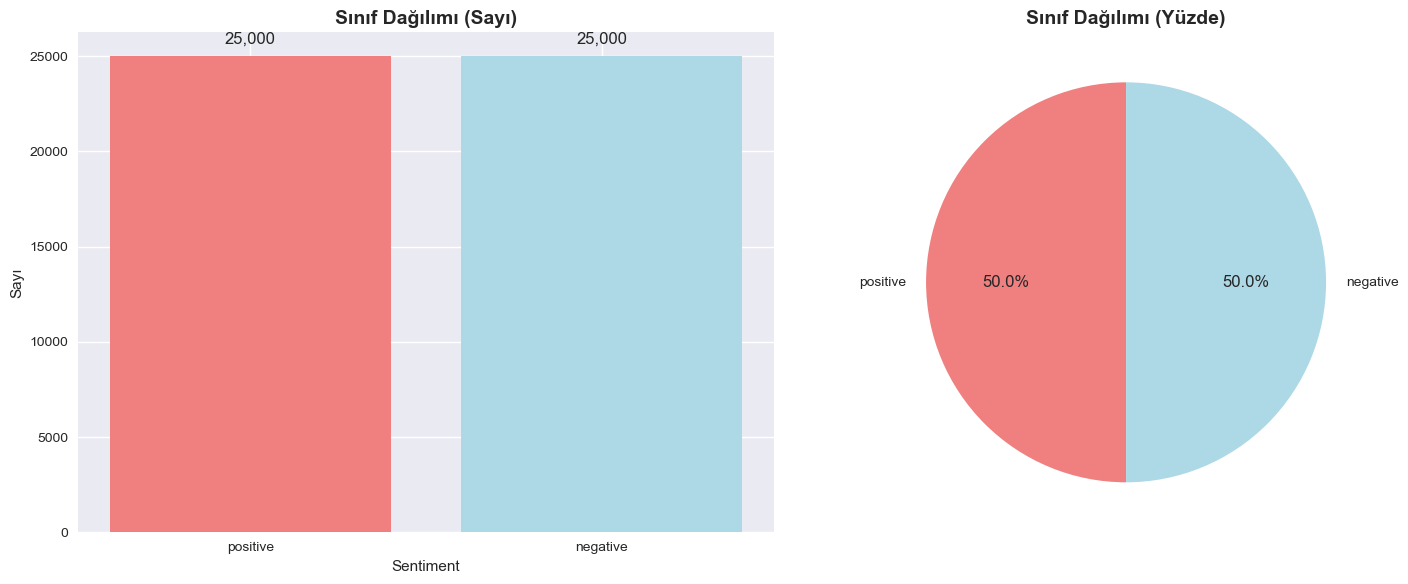

In [4]:
# =============================================================================
# 4. SINIF DAĞILIMI ANALİZİ
# =============================================================================

print("\n" + "="*50)
print("🎯 SINIF DAĞILIMI ANALİZİ")
print("="*50)

# Sınıf dağılımını kontrol et
print("📊 Sınıf dağılımı:")
class_counts = df['sentiment'].value_counts()
print(class_counts)

print("\n📈 Sınıf yüzdeleri:")
class_percentages = df['sentiment'].value_counts(normalize=True) * 100
print(class_percentages)

# Sınıf dağılımını görselleştir
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot
axes[0].bar(class_counts.index, class_counts.values, color=['lightcoral', 'lightblue'])
axes[0].set_title('Sınıf Dağılımı (Sayı)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentiment')
axes[0].set_ylabel('Sayı')
for i, v in enumerate(class_counts.values):
    axes[0].text(i, v + 500, f'{v:,}', ha='center', va='bottom')

# Pie chart
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%', 
           colors=['lightcoral', 'lightblue'], startangle=90)
axes[1].set_title('Sınıf Dağılımı (Yüzde)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


📏 METİN UZUNLUK ANALİZİ
📊 Karakter uzunluğu istatistikleri:
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: char_length, dtype: float64

📊 Kelime sayısı istatistikleri:
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: word_count, dtype: float64

📊 Cümle sayısı istatistikleri:
count    50000.000000
mean        13.153380
std          9.442849
min          0.000000
25%          7.000000
50%         11.000000
75%         16.000000
max        282.000000
Name: sentence_count, dtype: float64


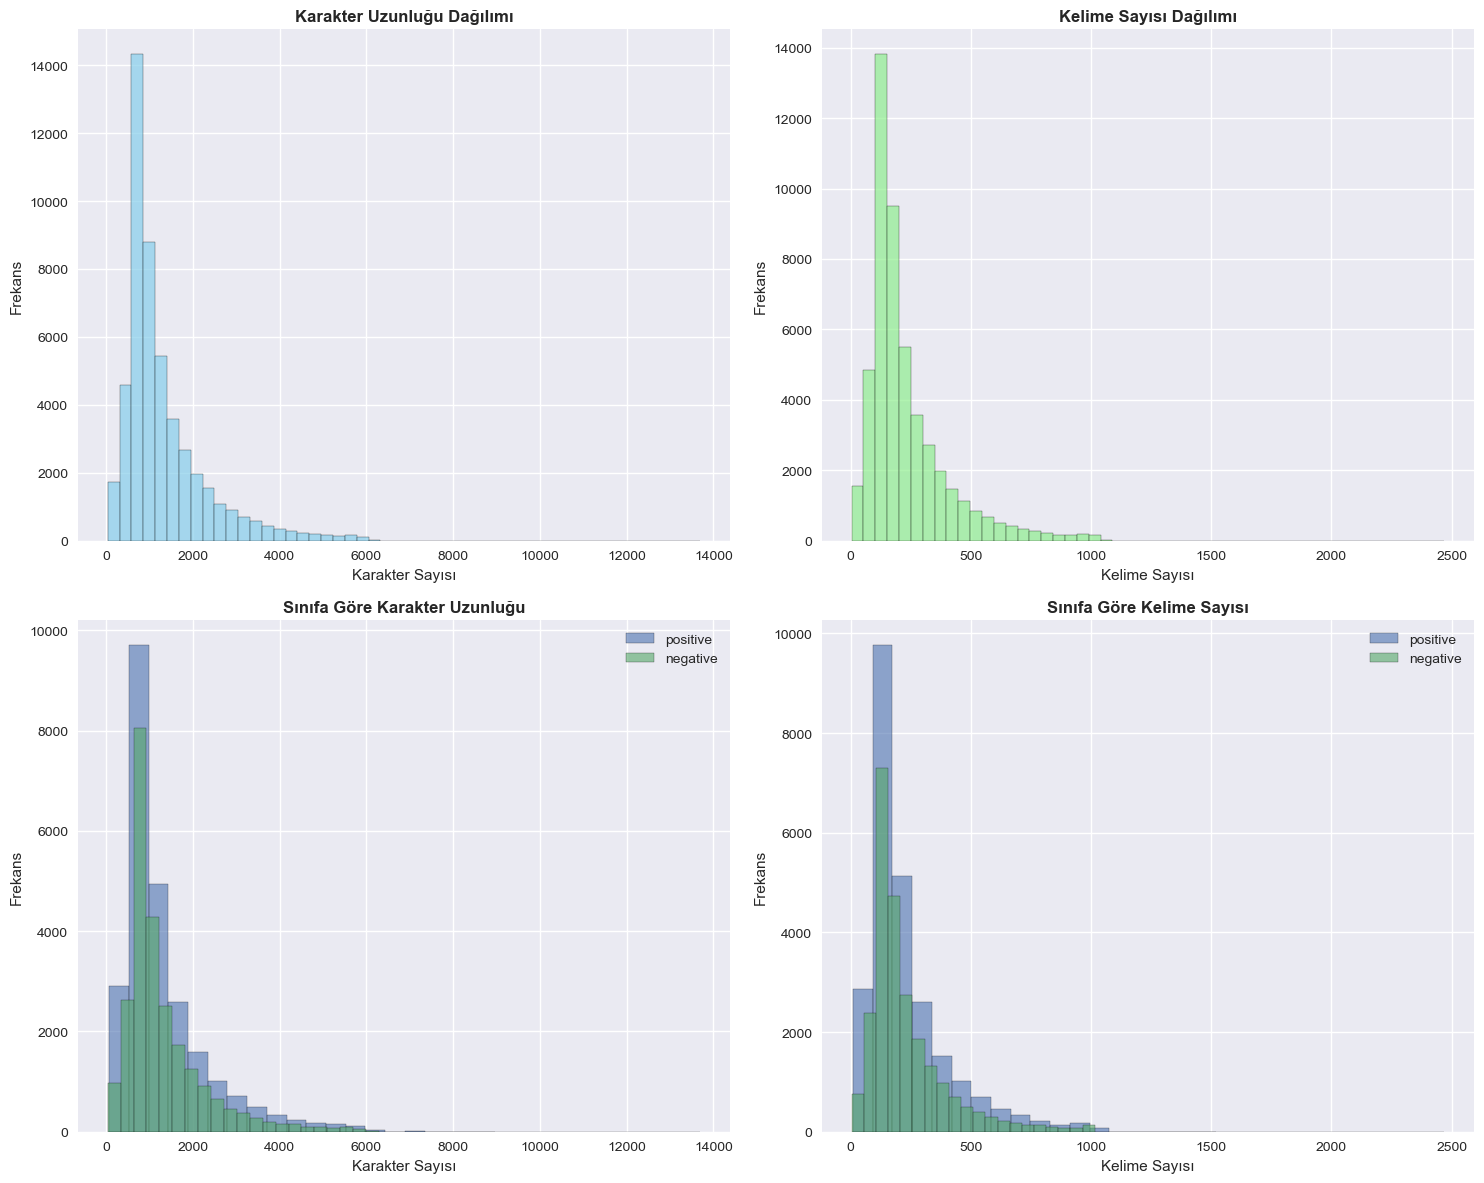

In [5]:
# =============================================================================
# 5. METİN UZUNLUK ANALİZİ
# =============================================================================

print("\n" + "="*50)
print("📏 METİN UZUNLUK ANALİZİ")
print("="*50)

# Karakter uzunluğu
df['char_length'] = df['review'].str.len()

# Kelime sayısı
df['word_count'] = df['review'].str.split().str.len()

# Cümle sayısı (yaklaşık)
df['sentence_count'] = df['review'].str.count(r'[.!?]+')

print("📊 Karakter uzunluğu istatistikleri:")
print(df['char_length'].describe())

print("\n📊 Kelime sayısı istatistikleri:")
print(df['word_count'].describe())

print("\n📊 Cümle sayısı istatistikleri:")
print(df['sentence_count'].describe())

# Uzunluk dağılımlarını görselleştir
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Karakter uzunluğu histogramı
axes[0, 0].hist(df['char_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Karakter Uzunluğu Dağılımı', fontweight='bold')
axes[0, 0].set_xlabel('Karakter Sayısı')
axes[0, 0].set_ylabel('Frekans')

# Kelime sayısı histogramı
axes[0, 1].hist(df['word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('Kelime Sayısı Dağılımı', fontweight='bold')
axes[0, 1].set_xlabel('Kelime Sayısı')
axes[0, 1].set_ylabel('Frekans')

# Sınıfa göre karakter uzunluğu
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]
    axes[1, 0].hist(subset['char_length'], bins=30, alpha=0.6, 
                   label=f'{sentiment}', edgecolor='black')
axes[1, 0].set_title('Sınıfa Göre Karakter Uzunluğu', fontweight='bold')
axes[1, 0].set_xlabel('Karakter Sayısı')
axes[1, 0].set_ylabel('Frekans')
axes[1, 0].legend()

# Sınıfa göre kelime sayısı
for sentiment in df['sentiment'].unique():
    subset = df[df['sentiment'] == sentiment]
    axes[1, 1].hist(subset['word_count'], bins=30, alpha=0.6, 
                   label=f'{sentiment}', edgecolor='black')
axes[1, 1].set_title('Sınıfa Göre Kelime Sayısı', fontweight='bold')
axes[1, 1].set_xlabel('Kelime Sayısı')
axes[1, 1].set_ylabel('Frekans')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [6]:
# =============================================================================
# 7. EKSİK VERİ KONTROLÜ
# =============================================================================

print("\n" + "="*50)
print("🔍 EKSİK VERİ KONTROLÜ")
print("="*50)

# Eksik değerleri kontrol et
missing_data = df.isnull().sum()
print("📊 Eksik veri sayısı:")
print(missing_data)

if missing_data.sum() == 0:
    print("✅ Hiç eksik veri yok!")
else:
    print("⚠️ Eksik veriler bulundu, temizlenecek.")

# Boş string kontrolü
empty_reviews = df['review'].str.strip().eq('').sum()
print(f"\n📝 Boş yorum sayısı: {empty_reviews}")


🔍 EKSİK VERİ KONTROLÜ
📊 Eksik veri sayısı:
review            0
sentiment         0
char_length       0
word_count        0
sentence_count    0
dtype: int64
✅ Hiç eksik veri yok!

📝 Boş yorum sayısı: 0


In [7]:
# =============================================================================
# 8. TEMEL İSTATİSTİKLER ÖZET
# =============================================================================

print("\n" + "="*50)
print("📋 PROJE ÖZET BİLGİLERİ")
print("="*50)

print(f"📊 Toplam veri sayısı: {len(df):,}")
print(f"🎯 Sınıf sayısı: {df['sentiment'].nunique()}")
print(f"📏 Ortalama karakter uzunluğu: {df['char_length'].mean():.0f}")
print(f"📖 Ortalama kelime sayısı: {df['word_count'].mean():.0f}")
print(f"🔍 En uzun yorum: {df['char_length'].max():,} karakter")
print(f"🔍 En kısa yorum: {df['char_length'].min():,} karakter")

# Veri setini kaydet (isteğe bağlı)
print(f"\n💾 Veri seti hazır! Sonraki adıma geçebilirsiniz.")
print(f"📁 Veri seti şu anda 'df' değişkeninde saklanıyor.")


📋 PROJE ÖZET BİLGİLERİ
📊 Toplam veri sayısı: 50,000
🎯 Sınıf sayısı: 2
📏 Ortalama karakter uzunluğu: 1309
📖 Ortalama kelime sayısı: 231
🔍 En uzun yorum: 13,704 karakter
🔍 En kısa yorum: 32 karakter

💾 Veri seti hazır! Sonraki adıma geçebilirsiniz.
📁 Veri seti şu anda 'df' değişkeninde saklanıyor.
